In [1]:
#!pip install wordcloud
#!pip install pyLDAvis
#!pip install advertools
#!pip install spacy

# Capstone Project:

## Sentiment Generation

In [2]:
%%capture
import snscrape  ##Importing for scrape the data through twitter
import pandas as pd ##Importing pandas library
import regex as re ##Importing Regular Expression
import matplotlib.pyplot as plt ##Importing library to create interactive visulizations
import gensim.corpora as corpora  ##importing corpora as external part of corpus
import gensim  ##importing library to for topic modeling
from nltk.corpus import stopwords ##Importing Stopwords from nltk corpus
from nltk.stem import WordNetLemmatizer ##Importing this librarty to grouping inflected words in a single file
from nltk.tokenize import TweetTokenizer ##Importing this library to convert string to list of substring
import nltk ##Importing Natural Language Toolkit to perfom NLP operations
import pyLDAvis.gensim_models as gensimvis ##Importing gensim models through pyLDAvis for LDA model
import pyLDAvis ##Importing pyLDAvis for interactive topic model visualization
import pickle ##Impoting for serializing and de-serializing

In [3]:
%%capture
nltk.download('words') ##Downlaoding words through nltk 
nltk.download('stopwords') ##Downloading stopwords through nltk
nltk.download('wordnet') ##Downloading wordnet through nltk
nltk.download('vader_lexicon') ##Downloading Vader_Lexicon through nltk

In [4]:
##making dataframe with help of panda
data = pd.read_csv("R:/DBA_SEM_4/402 Capstone/PreprocessingData.csv",lineterminator='\n')

In [5]:
#There is more attributes in my dataframe therefore assigning display option as max columns. 
pd.set_option('display.max_columns', None)

#First 5 records of my dataset
data.head()

,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,sourceLabel,hashtags\r
0,2021-06-29 23:59:52+00:00,Stream Schedule:\n\n6/29/21 - 8:15 PM EST\n6/3...,Stream Schedule:\n\n6/29/21 - 8:15 PM EST\n6/3...,1410025253770776579,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,6,4,0,1410025253770776579,en,Twitter Web App,"['twitch', 'twitchstreaming', 'twitchaffiliate..."
1,2021-06-29 23:59:40+00:00,Did y'all know I'm live? Like right now?! You ...,Did y'all know I'm live? Like right now?! You ...,1410025206626852869,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,3,7,0,1410025206626852869,en,Twitter for Android,"['smallstreamer', 'gaming', 'ApexLegends', 'tw..."
2,2021-06-29 23:59:32+00:00,Been a bit had some things come up but we are ...,Been a bit had some things come up but we are ...,1410025172782960644,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,2,0,1410025172782960644,en,Twitter for iPhone,"['ApexLegends', 'APEX', 'gaming', 'streamer', ..."
3,2021-06-29 23:59:18+00:00,We transitioned to playing Hades! If you want ...,We transitioned to playing Hades! If you want ...,1410025113576222721,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,3,0,1410025113576222721,en,Twitter for Android,"['envtuber', 'Vtuber', 'HadesGame', 'gaming']\r"
4,2021-06-29 23:58:47+00:00,Join our #esports club for a virtual workshop ...,Join our #esports club for a virtual workshop ...,1410024983728951297,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,1,0,1410024983728951297,en,HubSpot,"['esports', 'esports', 'gaming', 'coastlinecol..."


In [10]:
data.tail()

,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,sourceLabel,hashtags\r
875653,2021-01-01 00:00:01+00:00,The NES Happy Hour with Fitz and Master G...\n...,The NES Happy Hour with Fitz and Master G...\n...,1344795479234768897,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,3,6,0,1344795479234768897,en,Twitter Web App,"['retro', 'gaming', 'NES', 'retrogaming', 'Nin..."
875654,2021-01-01 00:00:01+00:00,☢🎮FREE PLAY--&gt;https://t.co/UEAv3aaSRM\n\n#C...,☢🎮FREE PLAY--&gt;bit.ly/2NFHIBh\n\n#CCG #TCG #...,1344795476151971842,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,9,7,0,1344795476151971842,en,TweetDeck,"['CCG', 'TCG', 'cardgame', 'gamedev', 'IndieGa..."
875655,2021-01-01 00:00:01+00:00,"Buy a Terraria Game Server now, we offer only ...","Buy a Terraria Game Server now, we offer only ...",1344795475300528128,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,0,0,1344795475300528128,en,TweetDeck,"['Terraria', 'GameServer', 'GameServers', 'Hos..."
875656,2021-01-01 00:00:00+00:00,https://t.co/Di01gKo7lG HAPPY NEW YEAR! SUBSCR...,youtube.com/user/chrismada… HAPPY NEW YEAR! SU...,1344795473433923585,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,2,3,1,1344795473433923585,en,TweetDeck,"['HappyNewYear', 'HNY', 'HappyNewYear2021', 'G..."
875657,2021-01-01 00:00:00+00:00,🎇Happy New Year!!🎆\n\n2020 has been a wild rid...,🎇Happy New Year!!🎆\n\n2020 has been a wild rid...,1344795472427290624,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,2,2,0,1344795472427290624,en,Twitter Web App,"['NewYearsEve', 'NewYear2021', 'gaming', 'game..."


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875658 entries, 0 to 875657
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   date             875658 non-null  object
 1   content          875658 non-null  object
 2   renderedContent  875658 non-null  object
 3   id               875658 non-null  int64 
 4   user             875658 non-null  object
 5   replyCount       875658 non-null  int64 
 6   retweetCount     875658 non-null  int64 
 7   likeCount        875658 non-null  int64 
 8   quoteCount       875658 non-null  int64 
 9   conversationId   875658 non-null  int64 
 10  lang             875658 non-null  object
 11  sourceLabel      875658 non-null  object
        875658 non-null  object
dtypes: int64(6), object(7)
memory usage: 86.8+ MB


In [12]:
#To get the shape of the data.
print("MY datase shape", data.shape)

MY datase shape (875658, 13)


In [13]:
#Gathering in-built stopwords
stop_words=stopwords.words('english')

print("Total Stop words count : ",len(stop_words),"\n\n\nStopwords are :-",stop_words)

Total Stop words count :  179 


Stopwords are :- ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'n

## First let's see basic example.

In [14]:
randomtext = "When I first met she was very quiet. She remained quiet during the entire six hour long journey from Surat to Mumbai on last weekend"

new = [w for w in randomtext.split() if w.lower() not in stop_words]

new_randomtext = " ".join(new)

print(new_randomtext)
print("OLD LENGTH: ", len(randomtext))
print("NEW LENGTH: ", len(new_randomtext))

first met quiet. remained quiet entire six hour long journey Surat Mumbai last weekend
OLD LENGTH:  132
NEW LENGTH:  86


In [15]:
data.columns

Index(['date', 'content', 'renderedContent', 'id', 'user', 'replyCount',
       'retweetCount', 'likeCount', 'quoteCount', 'conversationId', 'lang',
       'sourceLabel', 'hashtags\r'],
      dtype='object')

## There are various library for stopwords. Here I'm using nltk one but below thr one more example of spacy.

In [16]:
##Uncomment to run this.
##Spacy stop words
#import spacy

#en = spacy.load('en_core_web_sm')
#stop_spacy = en.Defaults.stop_words

#print(stop_spacy)

In [17]:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]


In [18]:
data.shape

(875658, 13)

In [19]:
#(?x) # Use free-spacing mode.
 # <    # Match a literal '<'
  #/?   # Optionally match a '/'
  #\[   # Match a literal '['
  #\d+  # Match one or more digits
  #>    # Match a literal '>'

In [20]:
#Function for Remove emojis in Tweets

def remove_emoji(tweet):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)


### Lambda Functions:

#### Lambda functions are a quick  way of writing functions. The format of writing these functions is my_lambda_function = lambda x: f(x) where we would replace f(x) with any function like x**2 or x[:2] .

In [21]:
#Function for cleaning the Tweets

def clean_tweets(tweet):
  # 
  # lowercase the text
    tweet = tweet.lower()
  # print('tweets:::', type(tweet)) 
  # remove mentions
    tweet = re.sub('@[\w]*','',tweet) 

    # remove hashtags
    tweet = re.sub("#[A-Za-z0-9_]+","", tweet)

    # remove urls
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)

    # remove punctions
    tweet = re.sub(r'[^\w\s]', '', tweet)
    tweet = re.sub('\n','',tweet)
    # remove numbers
    tweet = re.sub(r'\d+', '', tweet)

    # remove front space
    tweet = tweet.lstrip(' ')
    
    tweet = remove_emoji(tweet)

    return tweet

data['content'] = data['content'].apply(lambda tweet: clean_tweets(tweet))

<>:9: DeprecationWarning: invalid escape sequence \w
<>:9: DeprecationWarning: invalid escape sequence \w
C:\Users\Rosha\AppData\Local\Temp/ipykernel_23856/2038255637.py:9: DeprecationWarning: invalid escape sequence \w
  tweet = re.sub('@[\w]*','',tweet)


In [22]:
data['content']

0         stream schedule   pm est  lunch stream  lunch ...
1         did yall know im live like right now you didnt...
2         been a bit had some things come up but we are ...
3         we transitioned to playing hades if you want t...
4         join our  club for a virtual workshop to learn...
                                ...                        
875653    the nes happy hour with fitz and master g     ...
875654                    free playgt                      
875655    buy a terraria game server now we offer only t...
875656                     happy new year subscribe        
875657    happy new year has been a wild ride heres to h...
Name: content, Length: 875658, dtype: object

In [23]:
# Generate Sentiments of the Tweets

from nltk.sentiment.vader import SentimentIntensityAnalyzer #Importing to generate sentiment score on the tweet

sid = SentimentIntensityAnalyzer()

data['Positive Score'] = data['content'].apply(lambda tweet: sid.polarity_scores(tweet)['pos'])
data['Neutral Score'] = data['content'].apply(lambda tweet: sid.polarity_scores(tweet)['neu'])
data['Negative Score'] = data['content'].apply(lambda tweet: sid.polarity_scores(tweet)['neg'])
data['Polarity'] = data['content'].apply(lambda tweet: sid.polarity_scores(tweet)['compound'])


In [23]:
data.head(50)

,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,sourceLabel,hashtags,Positive Score,Neutral Score,Negative Score,Polarity
0,2021-06-29 23:59:52+00:00,stream schedule pm est lunch stream lunch ...,Stream Schedule:\n\n6/29/21 - 8:15 PM EST\n6/3...,1410025253770776579,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,6,4,0,1410025253770776579,en,Twitter Web App,"['twitch', 'twitchstreaming', 'twitchaffiliate...",0.000,1.000,0.000,0.0000
1,2021-06-29 23:59:40+00:00,did yall know im live like right now you didnt...,Did y'all know I'm live? Like right now?! You ...,1410025206626852869,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,3,7,0,1410025206626852869,en,Twitter for Android,"['smallstreamer', 'gaming', 'ApexLegends', 'tw...",0.137,0.764,0.099,0.1744
2,2021-06-29 23:59:32+00:00,been a bit had some things come up but we are ...,Been a bit had some things come up but we are ...,1410025172782960644,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,2,0,1410025172782960644,en,Twitter for iPhone,"['ApexLegends', 'APEX', 'gaming', 'streamer', ...",0.000,1.000,0.000,0.0000
3,2021-06-29 23:59:18+00:00,we transitioned to playing hades if you want t...,We transitioned to playing Hades! If you want ...,1410025113576222721,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,3,0,1410025113576222721,en,Twitter for Android,"['envtuber', 'Vtuber', 'HadesGame', 'gaming']",0.233,0.602,0.165,-0.0258
4,2021-06-29 23:58:47+00:00,join our club for a virtual workshop to learn...,Join our #esports club for a virtual workshop ...,1410024983728951297,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,1,0,1410024983728951297,en,HubSpot,"['esports', 'esports', 'gaming', 'coastlinecol...",0.066,0.934,0.000,0.2960
5,2021-06-29 23:58:43+00:00,doom eternal first look on ps ray tracing mode...,DOOM ETERNAL First Look on ps5 ray tracing mod...,1410024963868925959,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,3,1,0,1410024963868925959,en,Twitter for Android,"['doom', 'ps5', 'gaming', 'youtube', 'youtubeg...",0.164,0.658,0.178,-0.0516
6,2021-06-29 23:58:42+00:00,tuesday stream with and live at,Tuesday stream with @0ttermatic_ and @okaypup1...,1410024962014994444,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,2,4,0,1410024962014994444,en,Twitter Web App,"['live', 'livestream', 'stream', 'streaming', ...",0.000,1.000,0.000,0.0000
7,2021-06-29 23:58:06+00:00,is off,#crescenthollow is 50% OFF:\n\nstore.steampowe...,1410024809086570499,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,11,11,0,1410024809086570499,en,Twitter Web App,"['crescenthollow', 'SteamSummerSale', 'art', '...",0.000,1.000,0.000,0.0000
8,2021-06-29 23:57:26+00:00,og kc amp back to we apex is back baby ...,OG KC &amp; Back to WE!! Apex is Back baby twi...,1410024644430778376,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,1,0,1410024644430778376,en,Streamlabs Twitter,"['apexlegends', 'apex', 'smallstreamer', 'supp...",0.000,1.000,0.000,0.0000
9,2021-06-29 23:57:09+00:00,guns explosions and rage possibly coop,"Guns, Explosions and Rage!!!!! possibly Co-Op ...",1410024571105861638,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,3,3,0,1410024571105861638,en,Streamlabs Twitter,"['gaming', 'twitch', 'twittchaffiliate', 'smal...",0.000,0.581,0.419,-0.5574


## Now, I get the relative sentiment score now I will add one more attribute which will show tweet's sentiment in category form, by using polarity value. 

In [24]:

data['Sentiment'] = ''

data.loc[data['Polarity'] > 0,'Sentiment']='Positive'
data.loc[data['Polarity'] == 0,'Sentiment']='Neutral'
data.loc[data['Polarity'] <0,'Sentiment']='Negative'

In [25]:
data.head()

,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,sourceLabel,hashtags\r,Positive Score,Neutral Score,Negative Score,Polarity,Sentiment
0,2021-06-29 23:59:52+00:00,stream schedule pm est lunch stream lunch ...,Stream Schedule:\n\n6/29/21 - 8:15 PM EST\n6/3...,1410025253770776579,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,6,4,0,1410025253770776579,en,Twitter Web App,"['twitch', 'twitchstreaming', 'twitchaffiliate...",0.000,1.000,0.000,0.0000,Neutral
1,2021-06-29 23:59:40+00:00,did yall know im live like right now you didnt...,Did y'all know I'm live? Like right now?! You ...,1410025206626852869,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,3,7,0,1410025206626852869,en,Twitter for Android,"['smallstreamer', 'gaming', 'ApexLegends', 'tw...",0.137,0.764,0.099,0.1744,Positive
2,2021-06-29 23:59:32+00:00,been a bit had some things come up but we are ...,Been a bit had some things come up but we are ...,1410025172782960644,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,2,0,1410025172782960644,en,Twitter for iPhone,"['ApexLegends', 'APEX', 'gaming', 'streamer', ...",0.000,1.000,0.000,0.0000,Neutral
3,2021-06-29 23:59:18+00:00,we transitioned to playing hades if you want t...,We transitioned to playing Hades! If you want ...,1410025113576222721,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,3,0,1410025113576222721,en,Twitter for Android,"['envtuber', 'Vtuber', 'HadesGame', 'gaming']\r",0.233,0.602,0.165,-0.0258,Negative
4,2021-06-29 23:58:47+00:00,join our club for a virtual workshop to learn...,Join our #esports club for a virtual workshop ...,1410024983728951297,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,1,0,1410024983728951297,en,HubSpot,"['esports', 'esports', 'gaming', 'coastlinecol...",0.066,0.934,0.000,0.2960,Positive


In [26]:
#data = pd.read_csv("R:/DBA_SEM_4/402 Capstone/SentiGen.csv",lineterminator='\n')

In [27]:
data.head()

,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,sourceLabel,hashtags\r,Positive Score,Neutral Score,Negative Score,Polarity,Sentiment
0,2021-06-29 23:59:52+00:00,stream schedule pm est lunch stream lunch ...,Stream Schedule:\n\n6/29/21 - 8:15 PM EST\n6/3...,1410025253770776579,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,6,4,0,1410025253770776579,en,Twitter Web App,"['twitch', 'twitchstreaming', 'twitchaffiliate...",0.000,1.000,0.000,0.0000,Neutral
1,2021-06-29 23:59:40+00:00,did yall know im live like right now you didnt...,Did y'all know I'm live? Like right now?! You ...,1410025206626852869,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,3,7,0,1410025206626852869,en,Twitter for Android,"['smallstreamer', 'gaming', 'ApexLegends', 'tw...",0.137,0.764,0.099,0.1744,Positive
2,2021-06-29 23:59:32+00:00,been a bit had some things come up but we are ...,Been a bit had some things come up but we are ...,1410025172782960644,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,2,0,1410025172782960644,en,Twitter for iPhone,"['ApexLegends', 'APEX', 'gaming', 'streamer', ...",0.000,1.000,0.000,0.0000,Neutral
3,2021-06-29 23:59:18+00:00,we transitioned to playing hades if you want t...,We transitioned to playing Hades! If you want ...,1410025113576222721,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,3,0,1410025113576222721,en,Twitter for Android,"['envtuber', 'Vtuber', 'HadesGame', 'gaming']\r",0.233,0.602,0.165,-0.0258,Negative
4,2021-06-29 23:58:47+00:00,join our club for a virtual workshop to learn...,Join our #esports club for a virtual workshop ...,1410024983728951297,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,1,0,1410024983728951297,en,HubSpot,"['esports', 'esports', 'gaming', 'coastlinecol...",0.066,0.934,0.000,0.2960,Positive


In [28]:
##To get which tweets generated positive score
data['Sentiment'] == 'Positive'

0         False
1          True
2         False
3         False
4          True
          ...  
875653     True
875654     True
875655     True
875656     True
875657     True
Name: Sentiment, Length: 875658, dtype: bool

In [29]:
##To check positive tweets info like content, hashtags,date and other attributes
data[data['Sentiment'] == 'Positive']

,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,sourceLabel,hashtags\r,Positive Score,Neutral Score,Negative Score,Polarity,Sentiment
1,2021-06-29 23:59:40+00:00,did yall know im live like right now you didnt...,Did y'all know I'm live? Like right now?! You ...,1410025206626852869,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,3,7,0,1410025206626852869,en,Twitter for Android,"['smallstreamer', 'gaming', 'ApexLegends', 'tw...",0.137,0.764,0.099,0.1744,Positive
4,2021-06-29 23:58:47+00:00,join our club for a virtual workshop to learn...,Join our #esports club for a virtual workshop ...,1410024983728951297,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,1,0,1410024983728951297,en,HubSpot,"['esports', 'esports', 'gaming', 'coastlinecol...",0.066,0.934,0.000,0.2960,Positive
10,2021-06-29 23:56:40+00:00,we are liiiiiiiiiiiiiive bruce buffer voice on...,WE ARE LIIIIIIIIIIIIIIVE!!! *BRUCE BUFFER VOIC...,1410024448363802625,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,1410024448363802625,en,StreamElements,"['fastbooger', 'twitch', 'twitchtv', 'gaming',...",0.286,0.714,0.000,0.7184,Positive
11,2021-06-29 23:56:35+00:00,my glytch just arrived and it tastes better b...,My glytch just arrived and it tastes 10× bette...,1410024427941765123,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,2,6,1,1410024427941765123,en,PlayStation®Network,"['MW', 'Gaming', 'Cod']\r",0.209,0.791,0.000,0.4404,Positive
13,2021-06-29 23:56:10+00:00,click real for atri atari token listing on coi...,Click 'real' for $ATRI (Atari Token) listing o...,1410024322866061314,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,3,1,1410024322866061314,en,Twitter Web App,"['CryptoNews', 'gaming', 'fintech', 'eth', 'Et...",0.101,0.899,0.000,0.2023,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875653,2021-01-01 00:00:01+00:00,the nes happy hour with fitz and master g ...,The NES Happy Hour with Fitz and Master G...\n...,1344795479234768897,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,3,6,0,1344795479234768897,en,Twitter Web App,"['retro', 'gaming', 'NES', 'retrogaming', 'Nin...",0.198,0.802,0.000,0.5719,Positive
875654,2021-01-01 00:00:01+00:00,free playgt,☢🎮FREE PLAY--&gt;bit.ly/2NFHIBh\n\n#CCG #TCG #...,1344795476151971842,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,9,7,0,1344795476151971842,en,TweetDeck,"['CCG', 'TCG', 'cardgame', 'gamedev', 'IndieGa...",0.767,0.233,0.000,0.5106,Positive
875655,2021-01-01 00:00:01+00:00,buy a terraria game server now we offer only t...,"Buy a Terraria Game Server now, we offer only ...",1344795475300528128,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,0,0,1344795475300528128,en,TweetDeck,"['Terraria', 'GameServer', 'GameServers', 'Hos...",0.160,0.840,0.000,0.6369,Positive
875656,2021-01-01 00:00:00+00:00,happy new year subscribe,youtube.com/user/chrismada… HAPPY NEW YEAR! SU...,1344795473433923585,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,2,3,1,1344795473433923585,en,TweetDeck,"['HappyNewYear', 'HNY', 'HappyNewYear2021', 'G...",0.552,0.448,0.000,0.5719,Positive


In [30]:
##To get the total tweet number which has Positive
data[data['Sentiment'] == 'Positive'].shape

(407137, 18)

In [31]:
##To get the total tweet number which has Neutral
data[data['Sentiment'] == 'Neutral'].shape

(321186, 18)

In [32]:
##To get the total tweet number which has Neutral
data[data['Sentiment'] == 'Negative'].shape

(147335, 18)

In [33]:
#converting date atributr to datetime
data['date'] = pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875658 entries, 0 to 875657
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   date             875658 non-null  datetime64[ns, UTC]
 1   content          875658 non-null  object             
 2   renderedContent  875658 non-null  object             
 3   id               875658 non-null  int64              
 4   user             875658 non-null  object             
 5   replyCount       875658 non-null  int64              
 6   retweetCount     875658 non-null  int64              
 7   likeCount        875658 non-null  int64              
 8   quoteCount       875658 non-null  int64              
 9   conversationId   875658 non-null  int64              
 10  lang             875658 non-null  object             
 11  sourceLabel      875658 non-null  object             
        875658 non-null  object             
 13  Positive Scor

In [35]:
a = data[data['date'].dt.month == 1].shape[0]
b = data[data['date'].dt.month == 2].shape[0]
c = data[data['date'].dt.month == 3].shape[0]
d = data[data['date'].dt.month == 4].shape[0]
e = data[data['date'].dt.month == 5].shape[0]
f = data[data['date'].dt.month == 6].shape[0]

print('Jan',a,'feb',b,'mar',c,'apr',d,'may',e,'june',f)


Jan 149350 feb 144177 mar 155835 apr 148072 may 143171 june 135053


In [40]:
monthss = data['date'].dt.month.unique()
monthss

array([6, 5, 4, 3, 2, 1], dtype=int64)

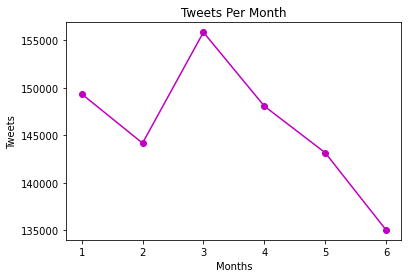

In [41]:
%matplotlib inline

monthss.sort()

tweet_counts = [a,b,c,d,e,f]

plt.xlabel('Months')
plt.ylabel('Tweets')
plt.title('Tweets Per Month')

plt.plot(monthss,tweet_counts,
         marker = 'o',
         color = 'm'
         )

#plt.savefig('R:/DBA_SEM_4/402 Capstone/totaltweets.jpeg')

## Tweets By Month

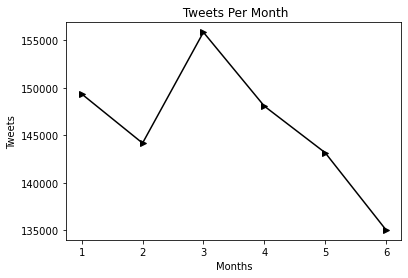

In [42]:
##Generating graph breakdown of tweets with respect of month it tweeted 

%matplotlib inline

tweets_list = []
months = [1,2,3,4,5,6]

for month in months:
    tweets_list.append(data[(pd.DatetimeIndex(data['date']).month == month)].shape[0])


plt.xlabel('Months')
plt.ylabel('Tweets')
plt.title(' Tweets Per Month')

plt.plot(months,tweets_list,
         marker = '>',
         color = 'k'
         )

## Plotting sentiment of tweets by Month

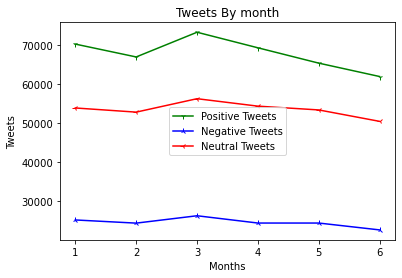

In [43]:
positive_tweets = []
negative_tweets = []
neutral_tweets = []

for month in monthss:
    positive_tweets.append(data[(pd.DatetimeIndex(data['date']).month == month) & (data['Sentiment'] == 'Positive')].shape[0])
    negative_tweets.append(data[(pd.DatetimeIndex(data['date']).month == month) & (data['Sentiment'] == 'Negative')].shape[0])
    neutral_tweets.append(data[(pd.DatetimeIndex(data['date']).month == month) & (data['Sentiment'] == 'Neutral')].shape[0])

plt.xlabel('Months')
plt.ylabel('Tweets')
plt.title('Tweets By month')
plt.plot(monthss, positive_tweets, label='Positive Tweets',color = 'green', marker = '1')
plt.plot(monthss, negative_tweets, label='Negative Tweets',color = 'blue', marker = '2')
plt.plot(monthss, neutral_tweets, label='Neutral Tweets', color = 'red', marker = '3')
plt.legend(loc = 0)

#plt.savefig('R:/DBA_SEM_4/402 Capstone/tweetsbymonth.jpeg')

## Pie Chart of Sentiment

([<matplotlib.patches.Wedge at 0x14553e8c520>,
 [Text(0.18132032641322895, 1.640006993652588, 'Positive'),
  Text(-0.9836596051022869, -1.324731588394424, 'Neutral'),
  Text(1.4248039309581035, -0.8321260471384945, 'Negative')],
 [Text(0.0989019962253976, 0.894549269265048, '46.49%'),
  Text(-0.5365416027830655, -0.7225808663969584, '36.68%'),
  Text(0.7771657805226018, -0.4538869348028151, '16.83%')])

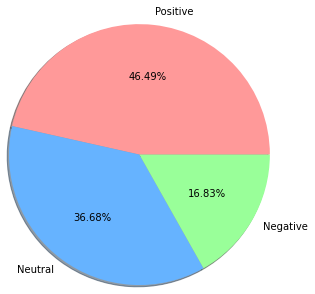

In [44]:
##For better visulizations I plot pie graph regarding that

pie_labels = ['Positive', 'Neutral', 'Negative']
pie_values = [data[data['Sentiment'] == 'Positive'].shape[0], data[data['Sentiment'] == 'Neutral'].shape[0], data[data['Sentiment'] == 'Negative'].shape[0]]

plt.pie(pie_values, 
        labels=pie_labels, 
        radius=1.5, 
        autopct='%0.2f%%', shadow=True, 
        colors=['#ff9999','#66b3ff','#99ff99'])

#plt.savefig('R:/DBA_SEM_4/402 Capstone/tweetpiesenti.jpeg')

In [45]:
# Tokenisation of tweets and remove stop words

#Adding my custom stopwords
stop_words.extend(['rt', 'amp', 'est','pm','hour','im','uk','go','us','via','get','see','hey','ps','na','u','g','th'])

def tokenize_tweet(tweet):

    # print('clean_tweet::',clean_tweet)
    token_list = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles= True).tokenize(tweet)
    clean_tweet = [w for w in token_list if not w.lower() in stop_words]
    return clean_tweet

data['Tokenised'] = data['content'].apply(lambda text: tokenize_tweet(text))

In [46]:
data['Tokenised']

0          [stream, schedule, lunch, stream, lunch, stream]
1         [yall, know, live, like, right, didnt, well, c...
2         [bit, things, come, back, tonight, going, chec...
3                [transitioned, playing, hades, want, stop]
4         [join, club, virtual, workshop, learn, basics,...
                                ...                        
875653    [nes, happy, fitz, master, featuringloopz, tun...
875654                                       [free, playgt]
875655    [buy, terraria, game, server, offer, best, ser...
875656                        [happy, new, year, subscribe]
875657    [happy, new, year, wild, ride, heres, hoping, ...
Name: Tokenised, Length: 875658, dtype: object

In [47]:
#aa = pd.DataFrame(data['Tokenised'])
#aa['Sentiment'] = data['Sentiment']

In [48]:
#aa.to_csv("R:/DBA_SEM_4/402 Capstone/Wordcloud.csv", index = False)

In [49]:
id2word = corpora.Dictionary(data['Tokenised'])

# Creating Term Document Frequency 
corpus = [id2word.doc2bow(text) for text in data['Tokenised']]

# Document-Term Matrix for Latent Dirichlet Allocation (LDA)

## Deep learning algorithms are used to build multi-dimensional mathematical representations of words called word vectors. 
## They provide information about the relationships between terms in a corpus. 
## The distance between the words ‘India’ and ‘New Delhi,’ for example, may be comparable to the distance between the words ‘China’ and ‘Beijing,’ as these are the ‘Country-Capital’ vectors.


In [50]:
[[(id2word[i], freq) for i, freq in doc] for doc in corpus[:1]]

[[('lunch', 2), ('schedule', 1), ('stream', 3)]]

# pyLDAvis is a interactive LDA visualization python package.
The area of "circle" represents the importance of each topic over the entire corpus, the distance between the center of circles indicate the similarity between topics. 
For each topic, the histogram on the right side listed the top most relevant terms specified.
Another way to “evaluate” whether your topic model is good or not is following your instinct. 
You can usually tell a story about the generated topics when you have a decent model. 

# Information regading iteractive graph
The left panel visualise the topics as circles in the two-dimensional plane whose centres are determined by computing the Jensen–Shannon divergence between topics, and then by using multidimensional scaling to project the inter-topic distances onto two dimensions. Each topic’s overall prevalence is encoded using the areas of the circles.

The right panel depicts a horizontal bar chart whose bars represent the individual terms that are the most useful for interpreting the currently selected topic on the left. A pair of overlaid bars represent both the corpus-wide frequency of a given term as well as the topic-specific frequency of the term.

The λ slider allows to rank the terms according to term relevance. By default, the terms of a topic are ranked in decreasing order according their topic-specific probability ( λ = 1 ). Moving the slider allows to adjust the rank of terms based on much discriminatory (or "relevant") are for the specific topic. The suggested “optimal” value of λ is 0.6.

### How to choose the number of topics?

#### LDA is an unsupervised technique, meaning that we don't know prior to running the model how many topics exits in our corpus. Topic coherence, is one of the main techniques used to deestimate the number of topics. You can read about it :
http://svn.aksw.org/papers/2015/WSDM_Topic_Evaluation/public.pdf

#### However, I used the LDA visualization tool pyLDAvis, tried a few number of topics and compared the resuls. Four seemed to be the optimal number of topics that would seperate topics the most.

In [51]:
#LDA mode training

from pprint import pprint #Importing pprint for print data structures in a readable, pretty way

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=20,
                                       random_state = 0)

## Iteractive graph

In [55]:
import pyLDAvis.gensim_models as gensimvis ##Importing gensim models through pyLDAvis for LDA model
import pyLDAvis ##Importing pyLDAvis for interactive topic model visualization
import pickle ##Impoting for serializing and de-serializing

##Enable the automatic display of visualizations in the IPython Notebook.
pyLDAvis.enable_notebook()

gensimvis.prepare(lda_model, corpus, id2word,sort_topics=False)

##SAVE THIS iterative model IN HTML FILE
#pyLDAvis.save_html(gensimvis.prepare(lda_model, corpus, id2word),'R:/DBA_SEM_4/402 Capstone/pylda.html')

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0     -0.026249  0.035454       1        1  4.264572
1     -0.031588  0.029130       2        1  3.973903
2      0.091078  0.044050       3        1  6.656181
3     -0.017245  0.034158       4        1  5.509955
4     -0.065547 -0.146289       5        1  3.823324
5     -0.100020  0.026221       6        1  5.100190
6     -0.011689  0.011456       7        1  4.664141
7     -0.022293  0.025381       8        1  4.076612
8      0.034032 -0.078061       9        1  3.405966
9     -0.030958 -0.034576      10        1  4.179144
10    -0.060632  0.042305      11        1  5.819655
11    -0.044301  0.040227      12        1  4.152755
12     0.028809  0.036565      13        1  4.514349
13    -0.032344 -0.004793      14        1  4.992581
14    -0.005882 -0.064330      15        1  3.632338
15    -0.050502  0.012805      16        1  4.596622
16     0.023270 -0.041461      17        1  4.612831
17     0.177108 -0.043592      18        1  8.564573
18     0.039246  0.031971      19        1  4.929173
19     0.105706  0.043378      20        1  8.531135, topic_info=         Term          Freq         Total Category  logprob  loglift
8        live  86331.000000  86331.000000  Default  30.0000  30.0000
3        come  57278.000000  57278.000000  Default  29.0000  29.0000
1284    steam  17942.000000  17942.000000  Default  28.0000  28.0000
18        new  87518.000000  87518.000000  Default  27.0000  27.0000
104      call   9480.000000   9480.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
25    playing   4655.154710  41799.736738  Topic20  -4.8840   0.2665
95       play   3936.852691  42670.400903  Topic20  -5.0516   0.0783
17      going   3459.385148  28346.628191  Topic20  -5.1808   0.3580
109      lets   3293.014675  25072.032809  Topic20  -5.2301   0.4315
401       one   3105.418005  32779.821670  Topic20  -5.2888   0.1048

[1932 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
39073      4  0.939719  aaron
39073      6  0.014457  aaron
39073     16  0.014457  aaron
39073     18  0.014457  aaron
3397       2  0.022107    abd
...      ...       ...    ...
11765      2  0.929274   çais
11765      6  0.059953   çais
41078     14  0.972858      ͡
36796      5  0.972210   قيمر
8064       3  0.979652      ℎ

[13168 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [56]:
pprint(lda_model.print_topics())

[(0,
  '0.011*"game" + 0.008*"little" + 0.007*"gaming" + 0.007*"today" + '
  '0.006*"card" + 0.006*"graphics" + 0.006*"stream" + 0.005*"day" + '
  '0.005*"part" + 0.005*"new"'),
 (1,
  '0.015*"stock" + 0.012*"thank" + 0.012*"may" + 0.011*"gaming" + '
  '0.010*"affiliate" + 0.010*"link" + 0.009*"amazon" + 0.009*"game" + '
  '0.009*"change" + 0.009*"daily"'),
 (2,
  '0.022*"video" + 0.019*"new" + 0.015*"come" + 0.011*"like" + 0.011*"play" + '
  '0.011*"watch" + 0.010*"say" + 0.009*"live" + 0.009*"check" + '
  '0.009*"channel"'),
 (3,
  '0.017*"gaming" + 0.011*"join" + 0.011*"check" + 0.010*"love" + '
  '0.008*"games" + 0.008*"game" + 0.007*"time" + 0.006*"live" + 0.006*"play" + '
  '0.005*"world"'),
 (4,
  '0.026*"steam" + 0.015*"gts" + 0.010*"record" + 0.009*"new" + 0.008*"games" '
  '+ 0.007*"lifetime" + 0.007*"od" + 0.007*"gaming" + 0.006*"game" + '
  '0.006*"part"'),
 (5,
  '0.016*"gaming" + 0.014*"one" + 0.012*"xbox" + 0.012*"best" + 0.010*"new" + '
  '0.010*"games" + 0.009*"game" +

# TOPIC 0 represented as '0.011*"game" + 0.008*"little" + 0.007*"gaming" + 0.007*"today" + ''0.006*"stream" + 0.005*"card" + 0.005*"day" + 0.005*"new" + 0.005*"part" + 0.005*"graphics.

# It means the top 10 keywords that contribute to this topic are: Game,little,gaming, today so on and the weight of game on TOPIC o is '.011'




In [57]:
#For particular topic top words
lda_model.show_topic(3, topn=10)

[('gaming', 0.016801327),
 ('join', 0.010770765),
 ('check', 0.010677542),
 ('love', 0.010471699),
 ('games', 0.0083781695),
 ('game', 0.008040849),
 ('time', 0.0069638947),
 ('live', 0.0059228195),
 ('play', 0.0058098),
 ('world', 0.0052801697)]

In [58]:
lda_model.show_topic(5, topn=20)

[('gaming', 0.016332695),
 ('one', 0.014156094),
 ('xbox', 0.012099078),
 ('best', 0.011903724),
 ('new', 0.010274932),
 ('games', 0.009777527),
 ('game', 0.008775608),
 ('playstation', 0.0061058425),
 ('series', 0.0059710415),
 ('good', 0.0055728373),
 ('pc', 0.0052719936),
 ('project', 0.004926241),
 ('play', 0.004472076),
 ('gb', 0.00439852),
 ('like', 0.004347285),
 ('nice', 0.004253955),
 ('time', 0.0039162287),
 ('rminecraftmemes', 0.0039125737),
 ('review', 0.0037584673),
 ('video', 0.0033348203)]

In [61]:
dictionary1 = gensim.corpora.Dictionary(data['Tokenised'])
dictionary2 = gensim.corpora.Dictionary(data['Tokenised'])
dictionary3 = gensim.corpora.Dictionary(data['Tokenised'])



# Filter out tokens that appear in
# less than specific  documents (absolute number) or
# more than 0.5 documents (fraction of total corpus size, not absolute number).
# If We required to reduce the size or any constraint that validate occurance of token we can do by this.

In [62]:
print(dictionary1)

Dictionary(240920 unique tokens: ['lunch', 'schedule', 'stream', 'come', 'didnt']...)


In [63]:
dictionary1.filter_extremes(no_below=25, no_above=0.5, keep_n=240920)

In [64]:
print(dictionary1)#25,.5

Dictionary(15001 unique tokens: ['lunch', 'schedule', 'stream', 'come', 'didnt']...)


In [65]:
dictionary2.filter_extremes(no_below=50, no_above=0.5, keep_n=240920)

In [66]:
print(dictionary2) #50,0.5

Dictionary(9997 unique tokens: ['lunch', 'schedule', 'stream', 'come', 'didnt']...)


In [67]:
dictionary3.filter_extremes(no_below=5000, no_above=0.5, keep_n=240920)


In [68]:
print(dictionary3) #5000,0.5

Dictionary(204 unique tokens: ['stream', 'come', 'hang', 'know', 'like']...)


In [69]:
# Topic modeling on positive tweets
id2word_positive = corpora.Dictionary(data[data['Sentiment'] == 'Positive']['Tokenised'])

# Creating Term Document Frequency 
corpus_positive = [id2word_positive.doc2bow(text) for text in data[data['Sentiment'] == 'Positive']['Tokenised']]

In [70]:
# Topic modeling on negative tweets
id2word_negative = corpora.Dictionary(data[data['Sentiment'] == 'Negative']['Tokenised'])

# Creating Term Document Frequency 
corpus_negative = [id2word_negative.doc2bow(text) for text in data[data['Sentiment'] == 'Negative']['Tokenised']]

In [71]:

lda_pmodel = gensim.models.LdaMulticore(corpus=corpus_positive,
                                       id2word=id2word_positive,
                                       num_topics=10)

In [72]:

lda_nmodel = gensim.models.LdaMulticore(corpus=corpus_negative,
                                       id2word=id2word_negative,
                                       num_topics=10)

In [73]:
[[(id2word_negative[i], freq) for i, freq in doc] for doc in corpus_negative[:1]]

[[('hades', 1), ('playing', 1), ('stop', 1), ('transitioned', 1), ('want', 1)]]

In [74]:
from collections import OrderedDict
import numpy as np
def get_doc_topic_dist(model, corpus, kwords=False): 
    '''
    LDA transformation, for each doc only returns topics with non-zero weight
    This function makes a matrix transformation of docs in the topic space.
    
    model: the LDA model
    corpus: the documents
    kwords: if True adds and returns the keys
    '''
    top_dist =[]
    keys = []
    for d in corpus:
        tmp = {i:0 for i in range(6)}
        tmp.update(dict(model[d]))
        vals = list(OrderedDict(tmp).values())
        top_dist += [np.asarray(vals)]
        if kwords:
            keys += [np.asarray(vals).argmax()]

    return np.asarray(top_dist), keys

In [75]:
top_dist, lda_keys= get_doc_topic_dist(lda_model, corpus, True)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [76]:
for i in range(20):
    print(f'\nTopic {str(i)}\n')
    for term,frequency in lda_model.show_topic(i,topn=10):
        print(u'{:20} {:.3f}'.format(term,round(frequency,3)))


Topic 0

game                 0.011
little               0.008
gaming               0.007
today                0.007
card                 0.006
graphics             0.006
stream               0.006
day                  0.005
part                 0.005
new                  0.005

Topic 1

stock                0.015
thank                0.012
may                  0.012
gaming               0.011
affiliate            0.010
link                 0.010
amazon               0.009
game                 0.009
change               0.009
daily                0.009

Topic 2

video                0.022
new                  0.019
come                 0.015
like                 0.011
play                 0.011
watch                0.011
say                  0.010
live                 0.009
check                0.009
channel              0.009

Topic 3

gaming               0.017
join                 0.011
check                0.011
love                 0.010
games                0.008
game           

In [77]:
top_ndist,lda_nkeys =get_doc_topic_dist(lda_nmodel,corpus_negative, True)

In [78]:
top_pdist,lda_pkeys =get_doc_topic_dist(lda_pmodel,corpus_positive, True)

In [79]:
for i in range(10):
    print(f'\nTopic {str(i)}\n')
    for term,frequency in lda_nmodel.show_topic(i,topn=10):
        print(u'{:20} {:.3f}'.format(term,round(frequency,3)))


Topic 0

war                  0.012
new                  0.012
game                 0.010
call                 0.010
cold                 0.009
duty                 0.009
video                0.009
one                  0.008
black                0.007
games                0.006

Topic 1

game                 0.012
new                  0.011
evil                 0.009
time                 0.008
live                 0.008
resident             0.007
gaming               0.007
check                0.006
availability         0.005
first                0.004

Topic 2

game                 0.011
new                  0.009
battle               0.008
time                 0.007
discord              0.006
first                0.005
dead                 0.005
call                 0.004
one                  0.004
stop                 0.004

Topic 3

evil                 0.013
live                 0.012
resident             0.012
new                  0.011
game                 0.010
village        

In [80]:
for i in range(10):
    print(f'\nTopic {str(i)}\n')
    for term,frequency in lda_pmodel.show_topic(i,topn=10):
        print(u'{:20} {:.3f}'.format(term,round(frequency,10)))


Topic 0

new                  0.019
come                 0.014
good                 0.012
play                 0.010
live                 0.010
join                 0.009
today                0.009
streaming            0.009
stream               0.008
games                0.008

Topic 1

game                 0.021
join                 0.012
stream               0.011
great                0.009
come                 0.008
games                0.008
playing              0.007
play                 0.007
gaming               0.007
going                0.007

Topic 2

new                  0.011
love                 0.010
join                 0.009
like                 0.008
come                 0.007
gaming               0.007
game                 0.007
time                 0.007
playing              0.006
play                 0.006

Topic 3

top                  0.016
steam                0.015
global               0.012
date                 0.011
game                 0.010
report         

In [81]:
#Saving Pre Processing Data 

#Sentiment_Data = data

In [82]:
#Sentiment_Data.to_csv("R:/DBA_SEM_4/402 Capstone/SentimentDataFINAL.csv", index = False)